# Recommender Systems with Python

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Get the data - User Data

In [4]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
user_data = pd.read_csv('u.data', names=col_names, sep='\t')

In [5]:
user_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
user_data.shape

(100003, 4)

In [7]:
user_data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [8]:
user_data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [9]:
# No null values

In [10]:
# Get the data - Movies Data

In [11]:
movies_df = pd.read_csv('Movie_Id_Titles')

In [12]:
movies_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
movies_df.shape

(1682, 2)

In [14]:
movies_df.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [15]:
movies_df.isnull().sum()

item_id    0
title      0
dtype: int64

In [16]:
# No null values

In [17]:
# Merge the data
df = pd.merge(user_data, movies_df, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
df.shape

(100003, 5)

In [22]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

In [18]:
# EDA

In [68]:
!pip install pandas_profiling

In [30]:
import pandas_profiling as pf

In [32]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
#Importing vis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [34]:
# Creating Ratings
# Highest Ratings for a particular movie
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [36]:
# Highest Count of Ratings for a particular movie
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [39]:
ratings_df =  pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
# Highest Ratings for a particular movie -
#ratings_df.sort_values(by='rating', ascending=False).head()

# This will return all the rows with higherst rating in descending order - Does not servers our purpose

In [43]:
# Adding the no of ratings columns to the df
ratings_df['rating_count'] = pd.DataFrame(df.groupby('title')['rating'].count())


In [44]:
ratings_df.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

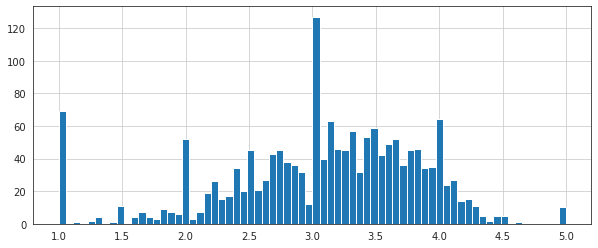

In [45]:
# Creating histograms
plt.figure(figsize=(10,4))
ratings_df['rating'].hist(bins=70)

<AxesSubplot:>

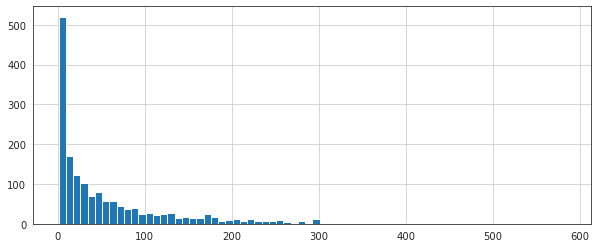

In [47]:
plt.figure(figsize=(10,4))
ratings_df['rating_count'].hist(bins=70)

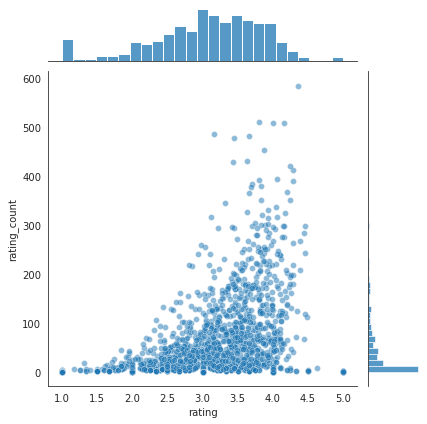

In [49]:
sns.jointplot(x='rating',y='rating_count',data=ratings_df,alpha=0.5)

In [ ]:
# Creating general Recommendations
'''Now let's create a matrix that has the user ids on one axis and the movie title on another axis.
Each cell will then consist of the rating the user gave to that movie. 
Note there will be a lot of NaN values, because most people have not seen most of the movies.'''

In [50]:
movies_matrix = df.pivot_table(index='user_id',columns='title', values='rating')
movies_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Most Rated movies
ratings_df.sort_values('rating_count',ascending=False).head(10)

,rating,rating_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [54]:
# Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.
star_wars_rating = movies_matrix['Star Wars (1977)']
liar_rating = movies_matrix['Liar Liar (1997)']
star_wars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [57]:
# We can then use corrwith() method to get correlations between two pandas series:
similar_to_starwars= movies_matrix.corrwith(star_wars_rating)
similar_to_liar= movies_matrix.corrwith(liar_rating)

In [ ]:
#Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [59]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head(20)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [ ]:
# ow if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. 
# This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie

In [60]:
# Sorting the corr
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [61]:
# Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [63]:
corr_starwars = corr_starwars.join(ratings_df.rating_count)
corr_starwars.head()

,Correlation,rating_count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [64]:
#Now sort the values and notice how the titles make a lot more sense:

In [65]:
corr_starwars[corr_starwars['rating_count']>100].sort_values('Correlation',ascending=False).head()

,Correlation,rating_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [67]:
# Perform similar steps for Liar Liar
corr_liar = pd.DataFrame(similar_to_liar,columns=['Correlation'])
corr_liar.dropna(inplace=True)
#corr_liar.sort_values('Correlation',ascending=False).head(10)
corr_liar = corr_liar.join(ratings_df.rating_count)
corr_liar[corr_liar['rating_count']>100].sort_values('Correlation',ascending=False).head(20)

,Correlation,rating_count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
